PROBLEM 1C

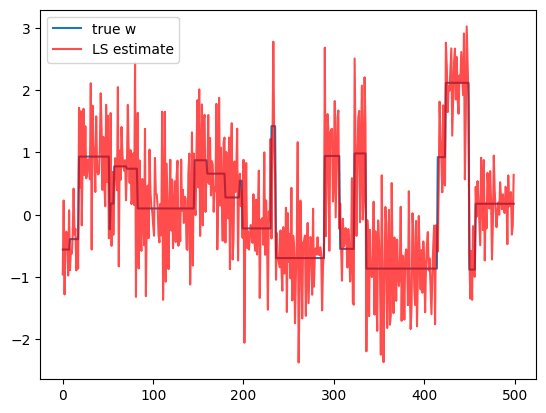

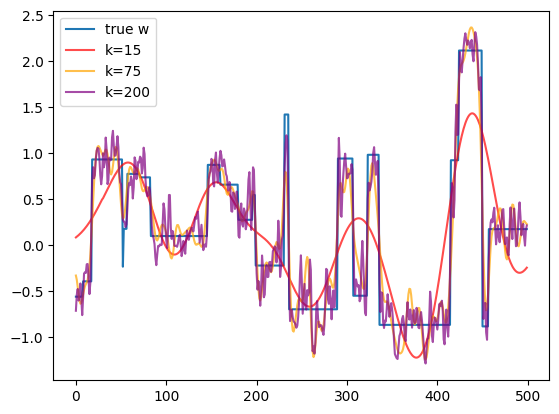

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.load("blurring.npz")
X = data['X']
y = data['y']

U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Estimate w using X and y with regular least squares
# Your code here
# S_t
w_LS = Vt.T@np.diag(1/S)@U.T@y

# Estimate w using X and y with truncated SVD
# Your code here

sigma_15 = np.diag(S[:15])
sigma_75 = np.diag(S[:75])
sigma_200 = np.diag(S[:200])

w_15 = Vt[:15,:].T@np.diag(1/S[:15])@U[:,:15].T@y
w_75 = Vt[:75,:].T@np.diag(1/S[:75])@U[:,:75].T@y
w_200 = Vt[:200,:].T@np.diag(1/S[:200])@U[:,:200].T@y

# Compare estimate to true value for LS

plt.plot(data['w'],label='true w')
plt.plot(w_LS, alpha=0.7,c='red',label='LS estimate')
plt.legend()
plt.show()

plt.plot(data['w'],label='true w')
plt.plot(w_15, alpha=0.7,c='red',label='k=15')
plt.plot(w_75, alpha=0.7,c='orange',label='k=75')
plt.plot(w_200, alpha=0.7,c='purple',label='k=200')
plt.legend()
plt.show()

For the OLS, the weights do not account for noise, so the noise in the data significantly impacts the weights. LS cannot differentiate the noise, so it attempts to account for it.

For SVD, the singificantly truncated solutions do not react to the nosie in the data as much compared to LS. However, this also means that the SVD may capture less of the actual pattern in the data as well. As k increases, the approximation in comparison to the actual weights do get more accurate. In general, removing smaller singular values when truncating eliminates vectors that capture noise.

PROBLEM 2

In [25]:
# PART B
A = np.matrix([[0,0,0,1],[1,0,0,0],[0,.5,0,0],[0,.5,1,0]])
pi = np.matrix([.25,.25,.25,.25]).T

for k in range(1000):
  pi = A@pi
print(pi)



[[0.28571429]
 [0.28571429]
 [0.14285714]
 [0.28571429]]


In [64]:
# PART C
import numpy as np
A = np.matrix([[0,0,0,1],[1,0,0,0],[0,.5,0,0],[0,.5,1,0]])
pi = np.matrix([.25,.25,.25,.25]).T
alpha = 0.8

n,p = A.shape

G = alpha*A + (1-alpha)*np.ones(A.shape)*1/n
G = G/G.sum(axis=0)

for k in range(1000):
  pi = G@pi
print(pi)

[[0.27967359]
 [0.27373887]
 [0.15949555]
 [0.28709199]]


PROBLEM 3A

(375, 500, 3)


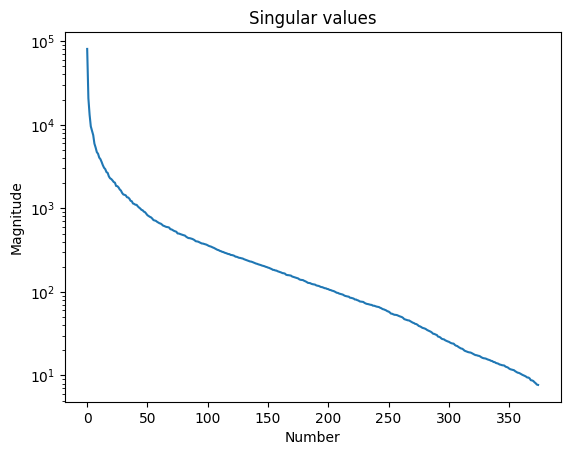

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image


img = Image.open("disaster-girl.jpg", mode="r")
img = np.array(img).astype(np.int32)

print(img.shape)


# YOUR CODE BELOW

img_stack = img.reshape((img.shape[0], -1))
U, S, Vt = np.linalg.svd(img_stack, full_matrices=False)


plt.plot(S)
plt.title('Singular values')
plt.xlabel('Number')
plt.ylabel('Magnitude')
plt.yscale('log')

In [34]:
# PART B
def compress(image, k):
    """
    Perform svd decomposition and truncate it (using k singular values/vectors)

    Parameters:
        image (np.array): input image (probably, colourful)
        k (int): approximation rank (number of singular values)

    Returns:
      reconst_matrix (np.array): reconstructed matrix (tensor in colourful case)

      s (np.array): array of singular values
    """
    # YOUR CODE IS HERE



    print(image.shape)

    s = []


    if len(image.shape) == 3: # Then Colorful
      reconst_matrix = np.zeros(image.shape)

      for i in range(3):
        image_stack = image[:,:,i]
        U, S, Vt = np.linalg.svd(image_stack, full_matrices=False)

        reconst_matrix[:,:,i] =  U[:,:k]@np.diag(S[:k])@Vt[:k,:]
        s.append(S)

      reconst_matrix = np.array(reconst_matrix , np.int32)
    else:
        U, S, Vt = np.linalg.svd(image_stack, full_matrices=False)
        reconst_matrix =  Vt[:k,:].T@np.diag(1/S[:k])@U[:,:k].T@y


    return reconst_matrix, s

(375, 500, 3)
(375, 500, 3)
(375, 500, 3)


Text(0.5, 1.0, 'Rank 50')

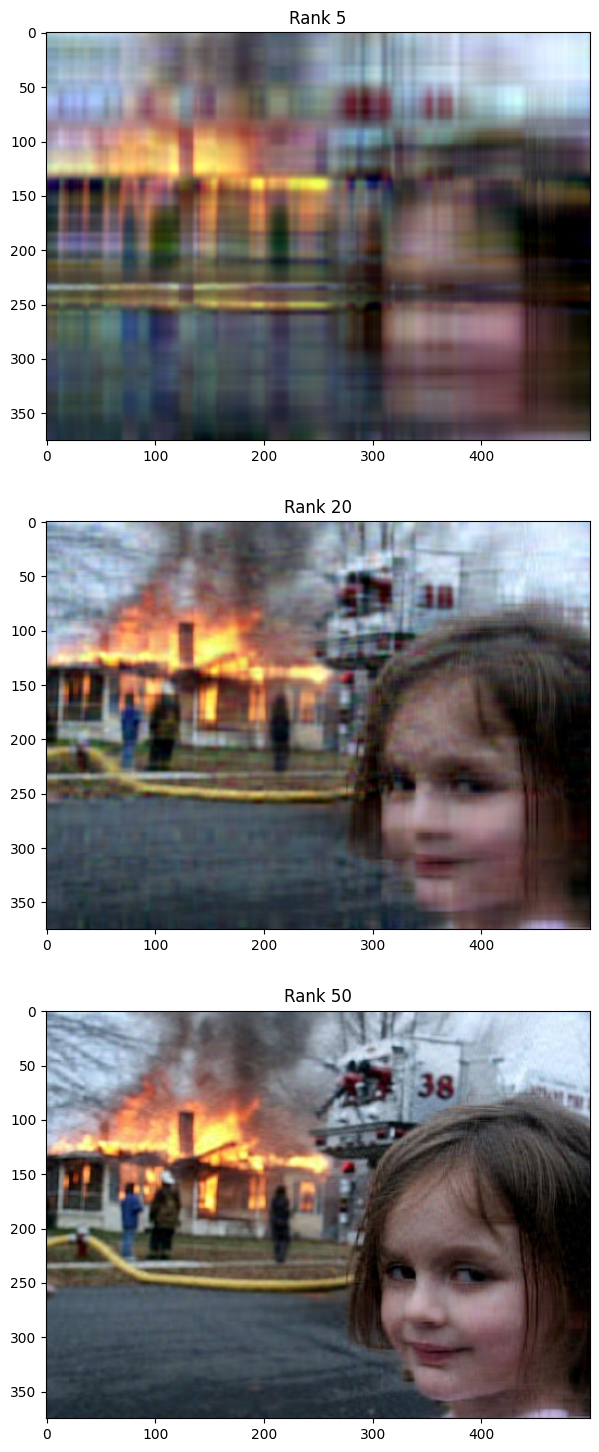

In [67]:
reconst_img_5 , s_5 = compress(img, 5)
reconst_img_20 , s_20 = compress(img, 20)
reconst_img_50 , s_50 = compress(img, 50)
fig = plt.figure(figsize=(18, 18))

plt.subplot(311)
plt.imshow(reconst_img_5)
plt.title('Rank 5')

plt.subplot(312)
plt.imshow(reconst_img_20)
plt.title('Rank 20')

plt.subplot(313)
plt.imshow(reconst_img_50)
plt.title('Rank 50')

(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)


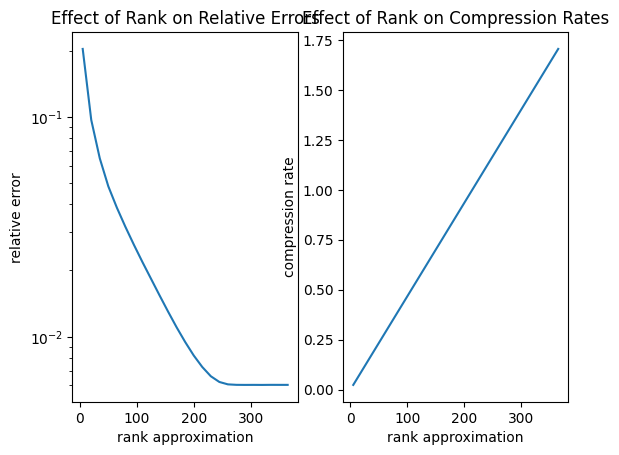

In [68]:
# PART C

def relative_error(image, k):
  img_shape = image.shape
  compressed_img, _ = compress(image, k)
  difference = image - compressed_img
  difference_norm = np.linalg.norm(difference)
  X_norm = np.linalg.norm(image)
  error = difference_norm / X_norm

  return error


def compression_rate(image, k):
  m, n = image.shape
  comp_rate =((m + n + 1)*k) / (m * n)
  return comp_rate


first_channel = img[:, :, 0]
ranks = []
rank = 5
while (rank < 375):
  ranks.append(rank)
  rank += 15

error = []
compress_ratio = []

for i in ranks:
  i = int(i)
  error.append(relative_error(img, i))
  compress_ratio.append(compression_rate(first_channel , i))


plt.subplot(121)
plt.plot(ranks, error)
plt.xlabel("rank approximation")
plt.ylabel('relative error')
plt.title('Effect of Rank on Relative Errors')
plt.yscale('log')

plt.subplot(122)
plt.plot(ranks, compress_ratio)
plt.xlabel("rank approximation")
plt.ylabel('compression rate')
plt.title('Effect of Rank on Compression Rates')
plt.show()

As seen in the graphs above, the relative error of approximation decreases drastically when rank increases initially, but this effect plateaus. Given the nature of SVD, as initial singular values have higher magnitude, they reduce error more significantly.

The compression rate is linearly correlated, as the size of sigma matrix is not considered in this calculation. There is an inverse relation between relative error and compression rate, which make sense. As more information is stored, there is less error. However, there does seem to be some sweet spot, as compression rate and rank are linearly correlated, but relative error is not. Also, compression rate can be higher than 1, which makes sense because you are storing several matrices to represent X.